## Personal Key Indicators of Heart Disease, an analysis

Heart disease is a leading cause of death in countries around the world. 

Research shows a number of comorbidities contribute to the risk of developing disease at all ages. 

Being able to predict the prevalence of heart disease will allow us to identify patients sooner and continue evolving from reactive medicine towards proactive intervention.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import os

from dython.nominal import associations, numerical_encoding, cluster_correlations
from dython.data_utils import split_hist

In [2]:
data = pd.read_csv('../CapstoneInProgress/heartPHI2020.csv')
df = data.copy()

In [3]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Dataset and column descriptions:

Kaggle Dataset at https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Adapted by the creator from the 2020 annual CDC BRFSS survey data of 400k adults related to their health status to include heart disease indicators. 

**Column Details:**

*HeartDisease:* Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). *(Yes / No)*

*BMI:* Body Mass Index (BMI) *(BMI=kg/(m^2))*

*Smoking:* Have you smoked at least 100 ciagrettes in your entire life? [Note: 1 pack = ~25 cigarettes] *(Yes / No)*

*AlcoholDrinking:* Heavy drinker? (Adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) *(Yes / No)*

*Stroke:* Have you ever been told you had a stroke? *(Yes / No)*

*PhysicalHealth:* How many days during the past 30 days was your physical health not good? (Including physical illness or injury.) *(0-30 days)*

*MentalHealth:* How many days during the past 30 days was your mental health not good? (Includes stress, depression, and problems with emotions.) *(0-30 days)*

*DiffWalking:* Do you have serious difficulty walking or climbing stairs? *(Yes / No)*

*Sex:* Are you Female or Male? *('Male', 'Female')*

*AgeCategory:* thirteen age categories. *('18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older')*

*Race:* Which one of these groups best represents your race? *('White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Hispanic', 'Other')*

*Diabetic:* Have you ever been told you have diabetes? *('Yes','No'','No, borderline diabetes', 'Yes (during pregnancy)')*

*PhysicalActivity:* Respondents who reported doing physical activity or exercise during the past 30 days other than their regular job. *(Yes / No)*

*GenHealth:* Would you say that your general health is- *('Poor','Fair','Good','Very good','Excellent')*

*SleepTime:* On average, how many hours of sleep do you get in a 24-hour period? *(0-24)*

*Asthma:* Have you ever been told you had asthma? *(Yes / No)*

*KidneyDisease:* Were you ever told you have kidney disease (Not including kidney stones, bladder infection or incontinence.) *(Yes / No)*

*SkinCancer:* Were you ever told you had skin cancer? *(Yes / No)*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [6]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## EDA and Data Wrangling

In [7]:
# nunique values in column
columns = df.columns
for col in columns:
    print('Nunique in ' + col + ': ' +  str(df[col].nunique()) + '\n')

Nunique in HeartDisease: 2

Nunique in BMI: 3604

Nunique in Smoking: 2

Nunique in AlcoholDrinking: 2

Nunique in Stroke: 2

Nunique in PhysicalHealth: 31

Nunique in MentalHealth: 31

Nunique in DiffWalking: 2

Nunique in Sex: 2

Nunique in AgeCategory: 13

Nunique in Race: 6

Nunique in Diabetic: 4

Nunique in PhysicalActivity: 2

Nunique in GenHealth: 5

Nunique in SleepTime: 24

Nunique in Asthma: 2

Nunique in KidneyDisease: 2

Nunique in SkinCancer: 2



In [8]:
# unique values in column
for col in columns:
    print('Unique values in ' + col + ': ' +  str(df[col].unique()) + '\n')

Unique values in HeartDisease: ['No' 'Yes']

Unique values in BMI: [16.6  20.34 26.58 ... 62.42 51.46 46.56]

Unique values in Smoking: ['Yes' 'No']

Unique values in AlcoholDrinking: ['No' 'Yes']

Unique values in Stroke: ['No' 'Yes']

Unique values in PhysicalHealth: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]

Unique values in MentalHealth: [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]

Unique values in DiffWalking: ['No' 'Yes']

Unique values in Sex: ['Female' 'Male']

Unique values in AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

Unique values in Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Unique values in Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

Unique values in Ph

In [9]:
# people with MentalHealth or PhysicalHealth response of 0, 
# responded that they had mental and physical problems 0 out of the last 30 days
df[['SleepTime', 'PhysicalHealth', 'MentalHealth']] = df[['SleepTime', 'PhysicalHealth', 'MentalHealth']].astype(int)

In [11]:
# similar to this study - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4877313/
# will evaluate, BMI PhysicalHealth, MentalHealth, and SleepTime as both continuous and categorical variables
# they used these bins for SleepTime of ≤ 6 h, > 6 to < 9 h, ≥ 9 h
# MentalHealth and PhysicalHealth variables are responses to how many days in last 30-31 were bad for health
# binning them by week
# Underweight: Less than 18.5, Healthy: 18.5 to 24.9, Overweight: 25 to 29.9, Class I obesity: 30 to 34.9, Class II obesity: 35 to 39.9, Class III obesity: More than 40.

sleep_bins = [-np.inf, 5, 7, 9, np.inf]
sleep_labels = ['≤ 5', '> 5 to ≤ 7 h', '> 7 to ≤ 9 h', '> 9 h']
df['SleepTime_binned'] = pd.cut(df['SleepTime'], bins=sleep_bins, labels=sleep_labels)

bmi_bins = [-np.inf, 18.49, 24.9, 29.9, 34.9, 39.9, np.inf]
bmi_labels = ['Underweight','Healthy','Overweight', 'Class I Obesity', 'Class II Obesity', 'Class III Obesity']
df['BMI_binned'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)

mental_bins = [-np.inf, 7, 14, 21, np.inf]
mental_labels = ['≤ 7 days','8-14 days','15-21 days', '> 21 days']
df['MentalHealth_binned'] = pd.cut(df['MentalHealth'], bins=mental_bins, labels=mental_labels)

physical_bins = [-np.inf, 7, 14, 21, np.inf]
physical_labels = ['≤ 7 days','8-14 days','15-21 days', '> 21 days']
df['PhysicalHealth_binned'] = pd.cut(df['PhysicalHealth'], bins=physical_bins, labels=physical_labels)

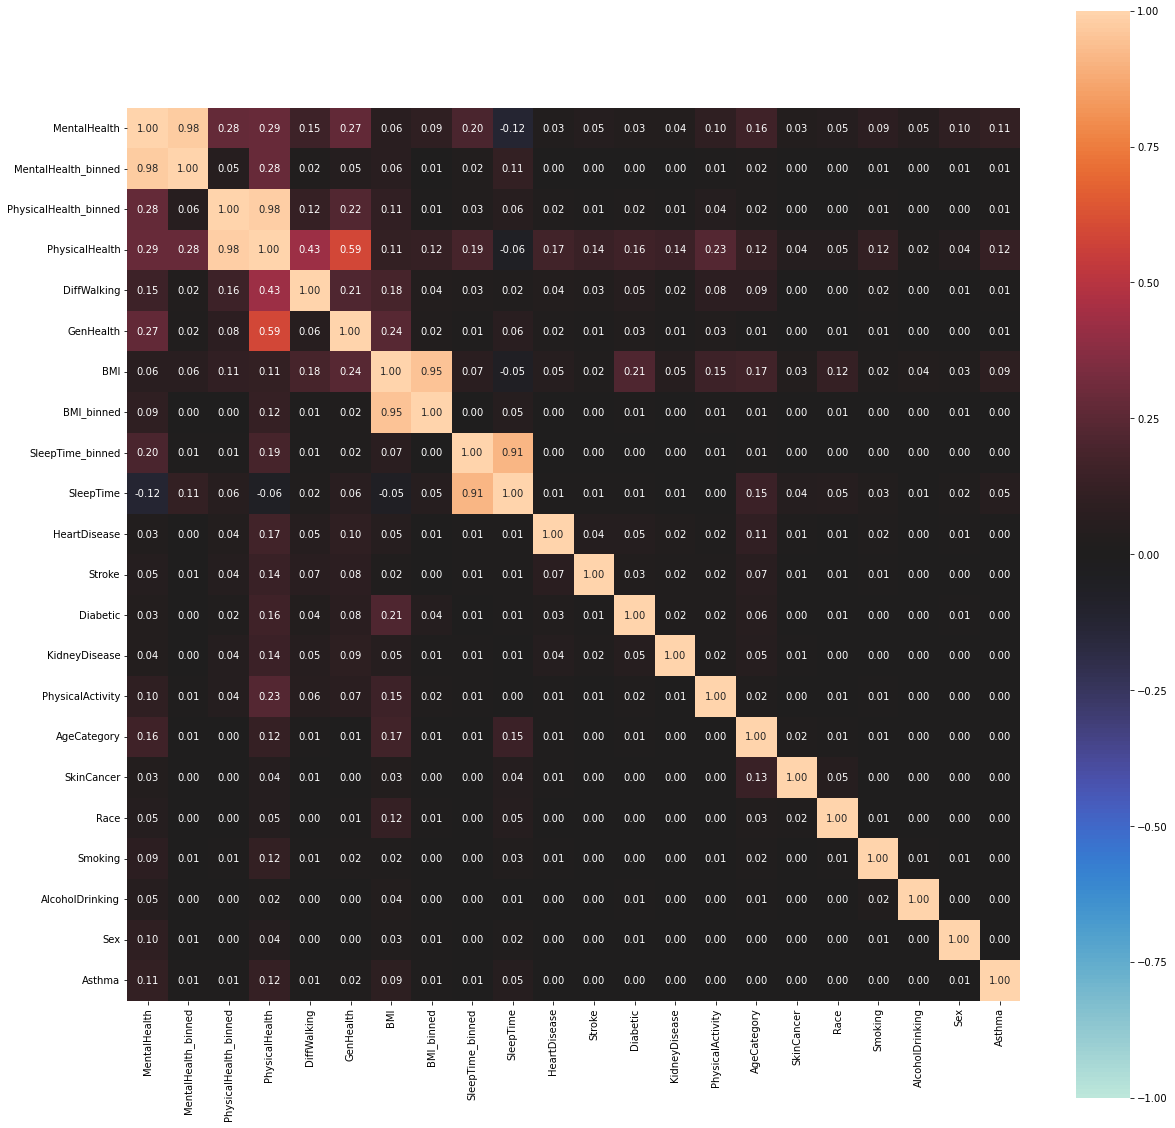

{'corr':                        MentalHealth  MentalHealth_binned  \
 MentalHealth               1.000000             0.976183   
 MentalHealth_binned        0.976183             1.000000   
 PhysicalHealth_binned      0.278476             0.058369   
 PhysicalHealth             0.287987             0.283623   
 DiffWalking                0.152235             0.024086   
 GenHealth                  0.266917             0.019946   
 BMI                        0.064131             0.064477   
 BMI_binned                 0.094974             0.002667   
 SleepTime_binned           0.196117             0.014259   
 SleepTime                 -0.119717             0.112335   
 HeartDisease               0.028591             0.002435   
 Stroke                     0.046467             0.006239   
 Diabetic                   0.034621             0.001533   
 KidneyDisease              0.037281             0.004175   
 PhysicalActivity           0.095808             0.009130   
 AgeCategory    

In [16]:
# make all categorical features type object to work with dython.nominal.associations
df[['SleepTime_binned', 'BMI_binned', 'MentalHealth_binned', 'PhysicalHealth_binned']] = \
                    df[['SleepTime_binned', 'BMI_binned', 'MentalHealth_binned', 'PhysicalHealth_binned']].astype(object)

assoc = associations(df, nom_nom_assoc='theil', clustering=True, figsize=(20,20))
assoc

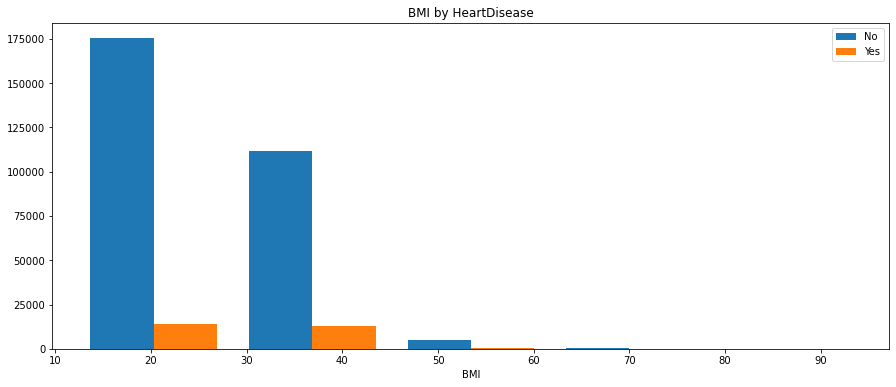

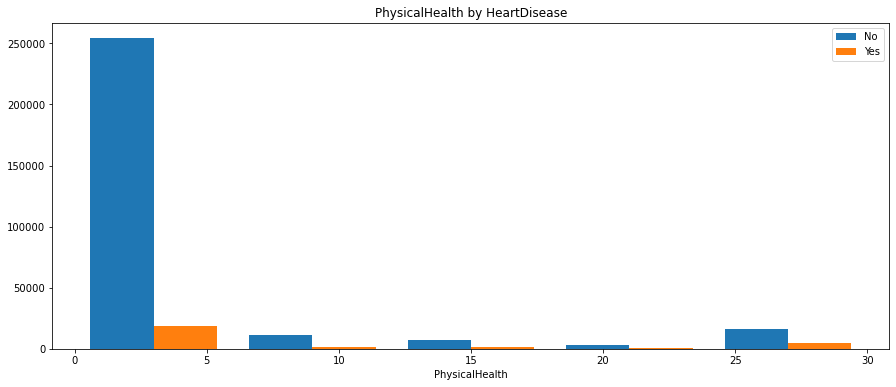

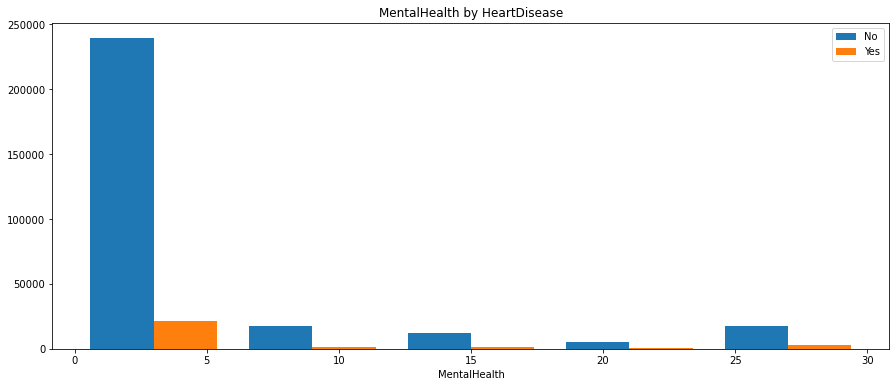

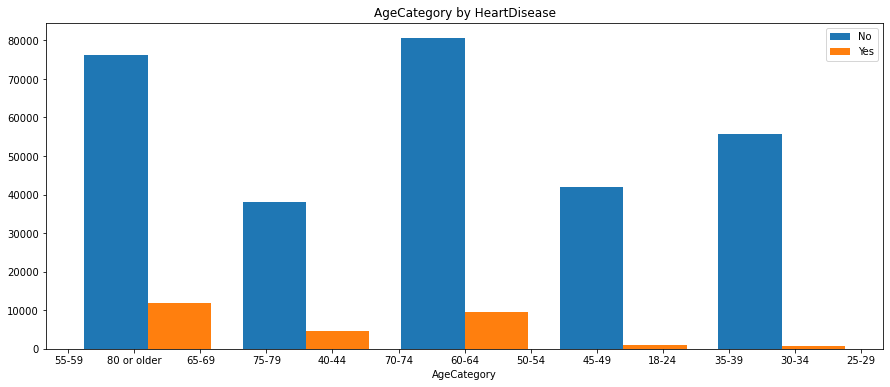

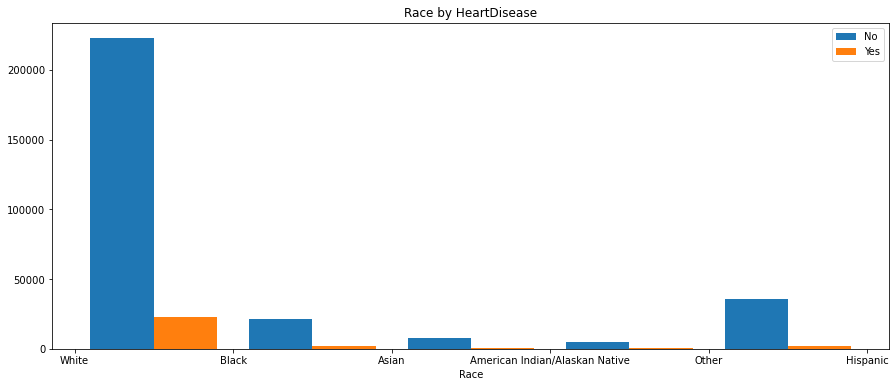

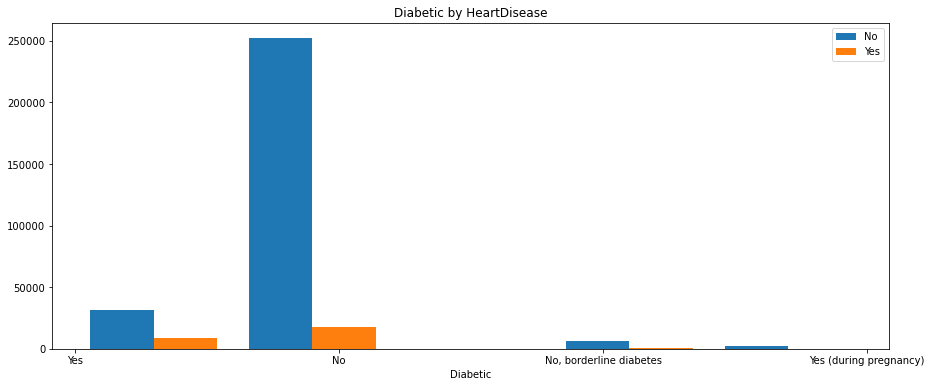

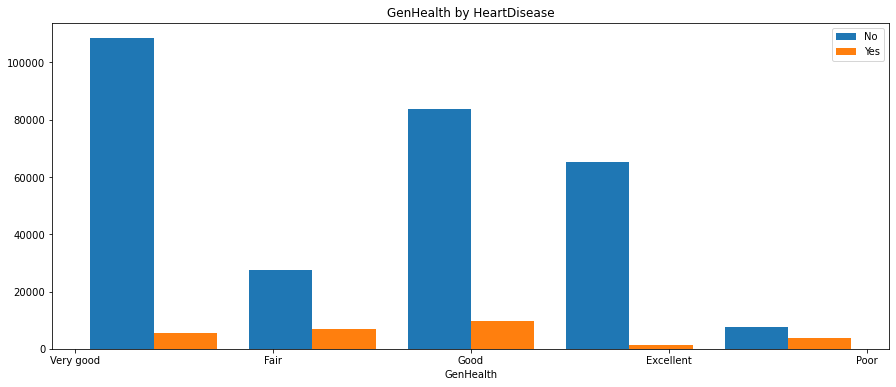

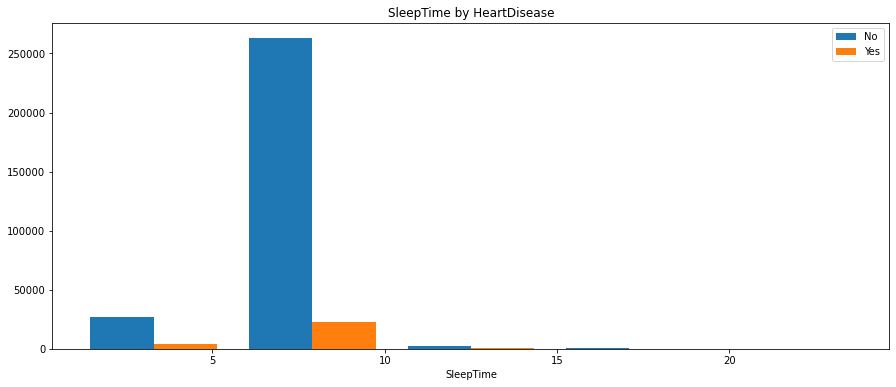

In [17]:
# distribution of features by HeartDisease
for col in columns:
    if df[col].nunique() > 2:
        split_hist(df, col, split_by='HeartDisease', bins=5, figsize=(15,6))